In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import math

df = pd.read_csv("/content/drive/MyDrive/Machine Learning data sets/play.csv")

In [3]:
total_count = len(df)
yes_count = len(df[df["play"] == "Yes"])
no_count = len(df[df["play"] == "No"])
entropy_play = -(yes_count/total_count)*math.log2(yes_count/total_count) - (no_count/total_count)*math.log2(no_count/total_count)
entropy_play

0.9402859586706311

In [4]:
def entropy_attribute(attribute):
    values = df[attribute].unique()
    entropy = 0
    for value in values:
        value_count = len(df[df[attribute] == value])
        yes_count = len(df[(df[attribute] == value) & (df["play"] == "Yes")])
        no_count = len(df[(df[attribute] == value) & (df["play"] == "No")])
        if yes_count == 0 or no_count == 0:
            value_entropy = 0
        else:
            value_entropy = -(yes_count/value_count)*math.log2(yes_count/value_count) - (no_count/value_count)*math.log2(no_count/value_count)
        entropy += (value_count/total_count)*value_entropy
    return entropy

In [5]:
#entropies
attributes = ["outlook", "temp", "humidity", "wind"]
for attribute in attributes:
  print(f"{attribute}:{entropy_attribute(attribute)}")

outlook:0.6935361388961918
temp:0.9110633930116763
humidity:0.7884504573082896
wind:0.8921589282623617


In [6]:
information_gain = {}
for attribute in attributes:
    information_gain[attribute] = entropy_play - entropy_attribute(attribute)

In [7]:
#information gain
for attribute,gain in information_gain.items():
  print(f"{attribute}:{gain}")

outlook:0.24674981977443933
temp:0.02922256565895487
humidity:0.15183550136234159
wind:0.04812703040826949


In [35]:
#finding root node
root_node = max(information_gain, key=information_gain.get)
print("\nRoot Node:", root_node)


Root Node: outlook


In [9]:
#using sklearn
import pandas as pd;
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df=pd.read_csv("/content/drive/MyDrive/Machine Learning data sets/play.csv")
data=df.drop(columns=["day"])
X=pd.get_dummies(data.iloc[:, :-1])
y=df["play"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

test_sample = pd.DataFrame({
    'outlook_Overcast': [0],
    'outlook_Rain': [1],
    'outlook_Sunny': [0],
    'temp_Cool': [1],
    'temp_Hot': [0],
    'temp_Mild': [0],
    'humidity_High': [1],
    'humidity_Normal': [0],
    'wind_Strong': [0],
    'wind_Weak': [1]
})

print("prediction for <Rain, Cool, High,Weak> :")
print(clf.predict(test_sample))



Accuracy: 0.6666666666666666
prediction for <Rain, Cool, High,Weak> :
['Yes']


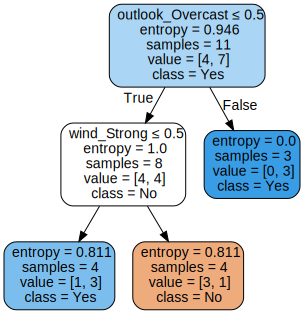

In [13]:
#Visualize
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=data.columns[:-1],
                filled=True, rounded=True, special_characters=True,
                class_names=['No', 'Yes'], max_depth=2)

graph = graphviz.Source(dot_data)
graph

In [30]:
#heart data set
#using sklearn
import pandas as pd;
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data=pd.read_csv("/content/drive/MyDrive/Machine Learning data sets/heart.csv")
X=pd.get_dummies(data.iloc[:, :-1])
y=data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy1)

Accuracy: 0.6780487804878049


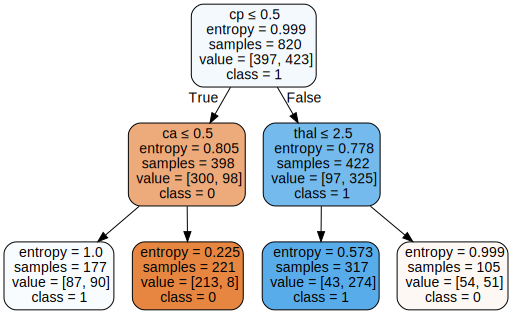

In [32]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=data.columns[:-1],
                filled=True, rounded=True, special_characters=True,
                class_names=['0', '1'],max_depth=2)

graph = graphviz.Source(dot_data)
graph

In [33]:
#changing splitting Criterion from entropy to gini
import pandas as pd;
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df=pd.read_csv("/content/drive/MyDrive/Machine Learning data sets/heart.csv")
X=pd.get_dummies(df.iloc[:, :-1])
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_leaf=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy2)

Accuracy: 0.8048780487804879


In [34]:
change_in_accuracy=abs(accuracy1-accuracy2)
print("Change in accuracy: ",change_in_accuracy)

Change in accuracy:  0.12682926829268293


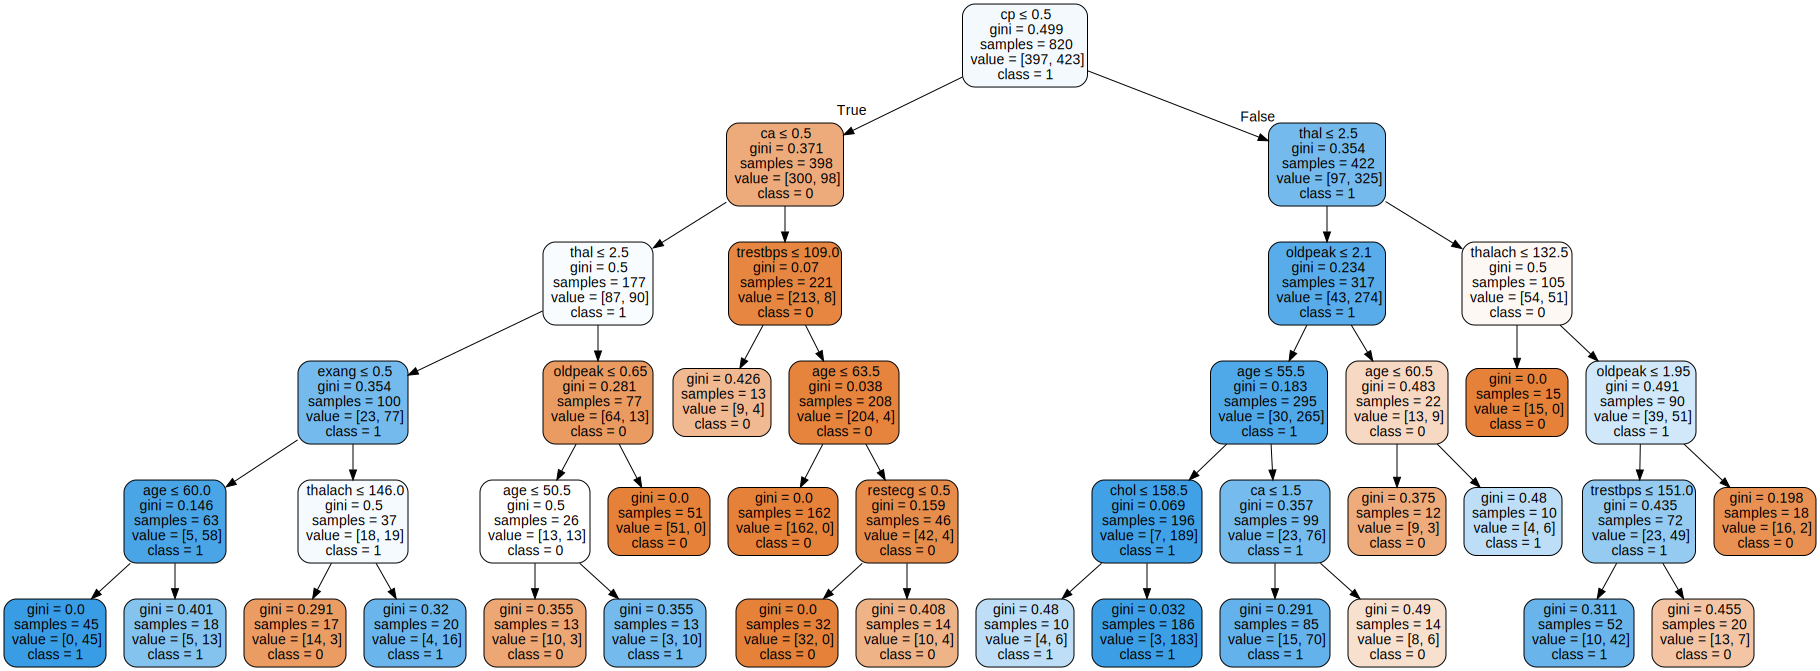

In [29]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=df.columns[:-1],
                filled=True, rounded=True, special_characters=True,
                class_names=['0', '1'],max_depth=5)

graph = graphviz.Source(dot_data)
graph